<a href="https://colab.research.google.com/github/SriRamK345/Credit_Card_Fraud_Detection_LogisticRegression/blob/main/Credit_Card_Fraud_Detection_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
# ! pip install opendatasets

In [102]:
# import opendatasets as od
# od.download("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")

## Importing Libraries

In [103]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [104]:
df = pd.read_csv("/content/creditcardfraud/creditcard.csv")

In [105]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Info :

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [149]:
df.isnull().sum()
#sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [108]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##  Check Null Values In The Dataset

In [109]:
df.isnull().sum().sum()

0

## Let's Remove Duplicated Values

In [110]:
df.shape

(284807, 31)

In [111]:
df.duplicated().any()

True

In [112]:
df.drop_duplicates(inplace = True)

In [113]:
df.shape

(283726, 31)

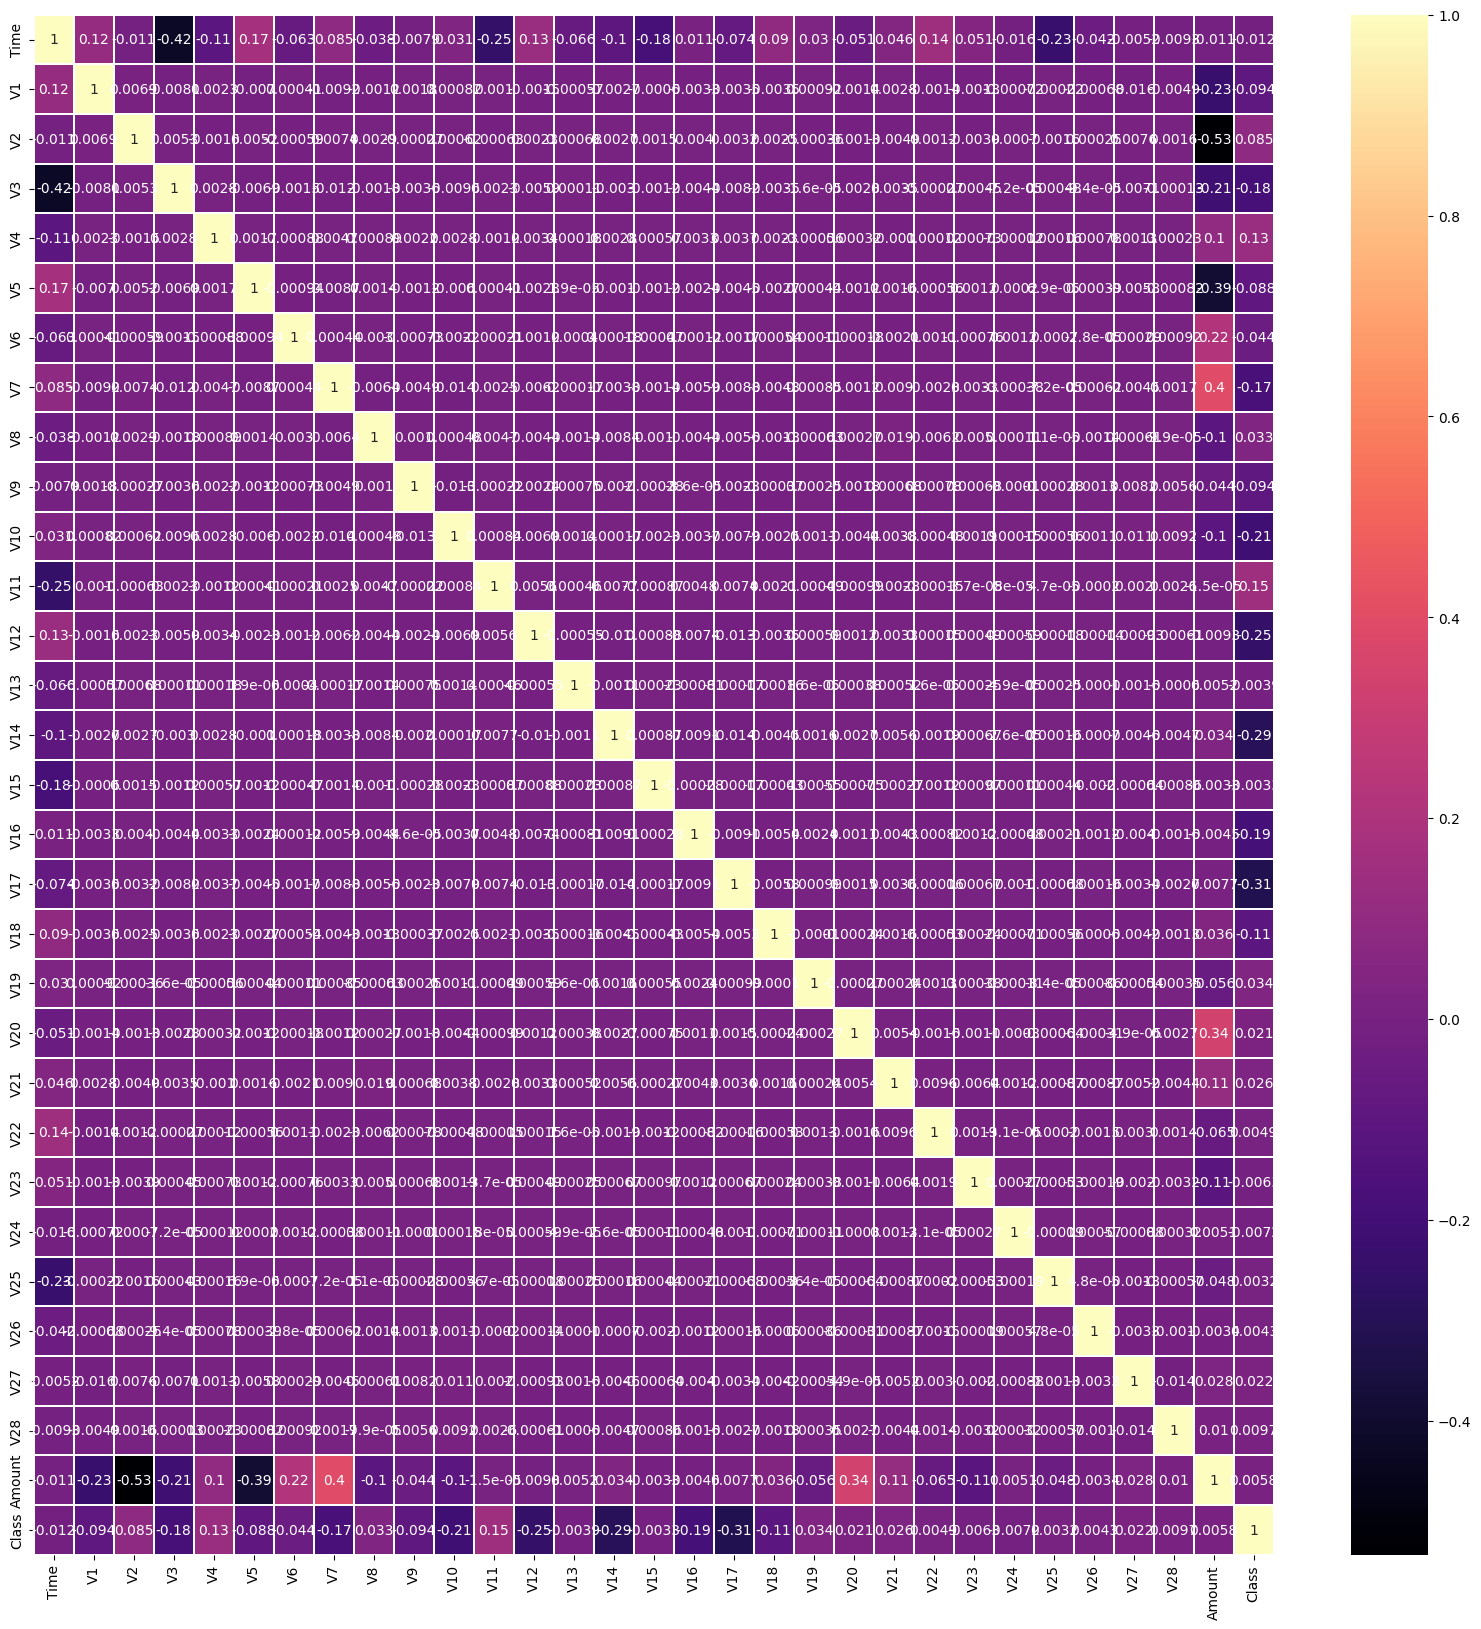

In [150]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),cmap = 'magma', annot = True, linewidths = 0.2)
plt.show()

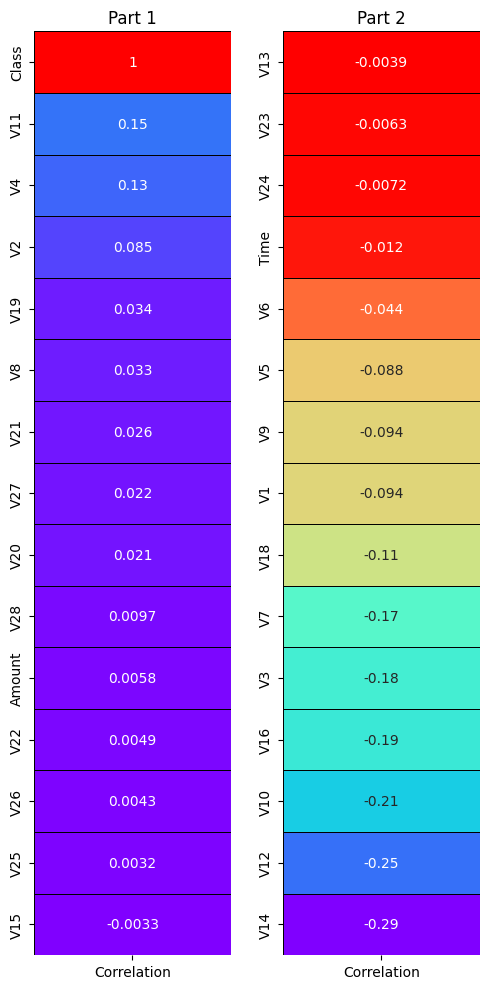

In [115]:
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,cmap = "rainbow",linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,cmap = "rainbow",linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

fig.tight_layout(w_pad = 2)

## ANOVA Test :

In [118]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [119]:
features = df.loc[:,:'Amount']
target = df.loc[:,'Class']

In [120]:
best_features = SelectKBest(score_func = f_classif, k = 'all')
fit = best_features.fit(features,target)

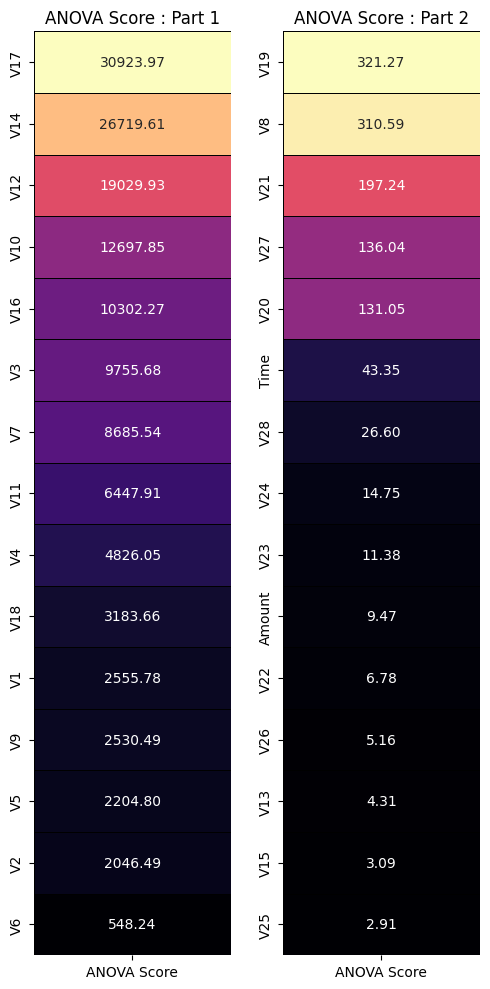

In [121]:
featureScores = pd.DataFrame(data = fit.scores_, index = list(features.columns), columns = ['ANOVA Score'])
featureScores = featureScores.sort_values(ascending = False,by = 'ANOVA Score')

fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(featureScores.iloc[:15,:],annot = True,cmap = "magma",linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1,2,2)
sns.heatmap(featureScores.iloc[15:30],annot = True,cmap = "magma",linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad = 2)

- Higher the value of the ANOVA score, higher the importance of that feature with the target variable.
- From the above plot, we will reject features with values less than 50.
- In this case, we will create 2 models based on features selected from the Correlation Plot & ANOVA Score.

## Dataset for Model based on Correlation Plot :

In [122]:
df1 = df[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


## Dataset for Model based on ANOVA Score :

In [123]:
df2 = df.copy(deep = True)
df2.drop(columns = list(featureScores.index[20:]),inplace = True)
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422,0


# <center><div style="font-family: Trebuchet MS; background-color: #3B3B3C; color: #FFD700; padding: 12px; line-height: 1;">Data Balancing</div></center>

- In order to cope with unbalanced data, there are 2 options :

    - **Undersampling** : Trim down the majority samples of the target variable.
    - **Oversampling** : Increase the minority samples of the target variable to the majority samples.
    
    
- For best performances, we will use the combination of undersampling and oversampling.
- First, we will undersample the majority samples and it is followed by oversampling minority samples.
- For data balancing, we will use **imblearn**.
- **PIP statement** : pip install imbalanced-learn

## Handling Imbalanced

In [ ]:
df["Class"].value_counts()

,count
Class,
0,283253
1,473


<Axes: xlabel='Class', ylabel='count'>

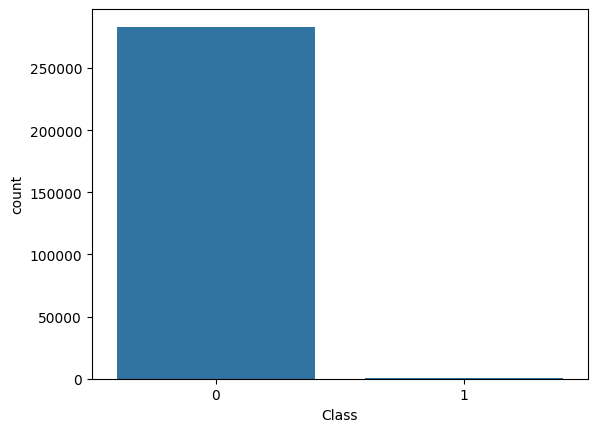

In [ ]:
sns.countplot(x = df["Class"])

In [152]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

In [125]:
# over = SMOTE(sampling_strategy = 0.5)
# under = RandomUnderSampler(sampling_strategy = 0.2)

# f1 = df1.iloc[:,:9].values
# t1 = df1.iloc[:,9].values

# steps = [('under', under),('over', over)]
# pipeline = Pipeline(steps=steps)
# f1, t1 = pipeline.fit_resample(f1, t1)
# Counter(t1)

In [126]:
X = df.drop('Class',axis=1)
y = df['Class']

In [127]:
df.Class.value_counts()

,count
Class,
0,283253
1,473


In [151]:
# sample_size = df[df['Class'] == 1].shape[0]
# sample_size

In [129]:
X_ = df[df['Class'] == 0].sample(n=10000)
y_ = df[df['Class'] == 1]

In [130]:
X = pd.concat([X_,y_])
y = X['Class']
X.drop('Class',axis=1,inplace=True)

In [131]:
X.shape, y.shape

((10473, 30), (10473,))

In [132]:
y.value_counts()

,count
Class,
0,10000
1,473


In [133]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [134]:
X_res.shape, y_res.shape

((20000, 30), (20000,))

In [135]:
print('Resampled dataset shape %s', Counter(y_res))

Resampled dataset shape %s Counter({0: 10000, 1: 10000})


## Feature Scaling

In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_res)
X=pd.DataFrame(scaler.transform(X_res))
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.690746,0.941731,0.634296,0.839240,0.180567,0.604128,0.380712,0.668241,0.661860,0.560980,...,0.544325,0.470810,0.637393,0.616689,0.403198,0.374458,0.329955,0.448448,0.580175,0.002022
1,0.739579,0.988832,0.620452,0.842063,0.216959,0.586898,0.527230,0.632796,0.681193,0.611914,...,0.549542,0.462352,0.575198,0.621607,0.222170,0.467201,0.343714,0.445242,0.552464,0.003707
2,0.811937,0.990063,0.634157,0.844877,0.286325,0.585156,0.436265,0.654264,0.668687,0.636426,...,0.543022,0.461223,0.566654,0.616255,0.318851,0.528391,0.324385,0.439637,0.549646,0.000302
3,0.846722,0.904279,0.614168,0.977749,0.285341,0.562932,0.503687,0.634544,0.680478,0.637810,...,0.541487,0.454027,0.544629,0.617025,0.390096,0.480549,0.235974,0.445095,0.551079,0.008425
4,0.320959,0.923091,0.654073,0.924302,0.281644,0.579476,0.427774,0.662712,0.671225,0.601075,...,0.552674,0.450606,0.474586,0.617638,0.447532,0.480359,0.360280,0.456079,0.561178,0.000217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.163760,0.154126,0.894157,0.060331,0.642382,0.041668,0.274725,0.366527,0.973003,0.448593,...,0.599848,0.491971,0.397280,0.589675,0.419364,0.711947,0.301778,0.520819,0.580145,0.016848
19996,0.446682,0.920382,0.658629,0.865677,0.388266,0.632372,0.440253,0.659595,0.673449,0.594953,...,0.557473,0.449658,0.474577,0.610622,0.223544,0.527266,0.306114,0.447549,0.561618,0.000168
19997,0.043559,0.934172,0.702885,0.702843,0.637260,0.614793,0.365924,0.628473,0.676934,0.478719,...,0.565891,0.462863,0.481274,0.600200,0.270474,0.662325,0.458997,0.484477,0.587258,0.000168
19998,0.244572,0.859715,0.671364,0.745352,0.644053,0.661460,0.344299,0.648108,0.663640,0.449458,...,0.545366,0.454893,0.529783,0.644008,0.346920,0.615150,0.483161,0.469925,0.528206,0.000168


## Splitting The Dataset Into The Training Set And Test Set

In [137]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y_res,
                                                test_size=0.2, random_state=42)

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
LR_model = LogisticRegression(random_state = 0,C=10,penalty= 'l2')
LR_model.fit(X_train,y_train)
y_pred = LR_model.predict(X_test)

In [140]:
from sklearn.metrics import accuracy_score

In [141]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.97775


In [142]:
from sklearn.model_selection import cross_val_score

In [143]:
scores = cross_val_score(LR_model, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.97075


In [144]:
from sklearn.metrics import RocCurveDisplay

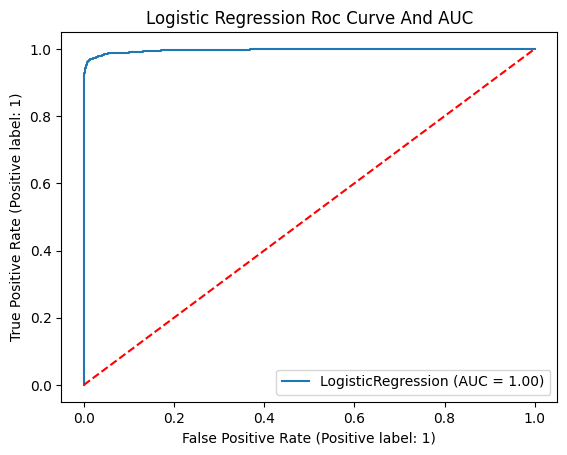

In [145]:
RocCurveDisplay.from_estimator(LR_model, X_test, y_test)
plt.title("Logistic Regression Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [146]:
# confustion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1996,   23],
       [  66, 1915]])

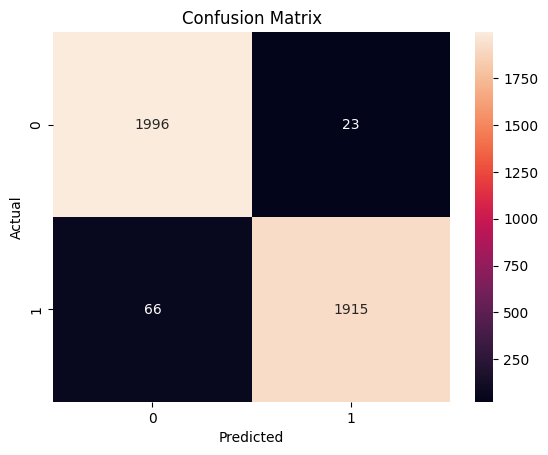

In [147]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [148]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2019
           1       0.99      0.97      0.98      1981

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000

